<a href="https://colab.research.google.com/github/Eminent01/AMMI_Research/blob/main/AMMI_Research_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install gym 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
!pip install gym-anytrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import gym_anytrading
import gym

In [61]:
!pip install stable_baselines3
# from stable_baselines3 import A2C

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
from stable_baselines3 import A2C 
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [64]:
data = pd.read_csv('/content/ETH.csv') 

In [65]:
df = pd.read_csv('/content/datasets.csv') 

In [66]:
df.head()

,date,stock_name,close,high,low,open,volume
0,2010-01-04 00:00:00-05:00,AAPL,6.515213,7.660714,7.585000,7.622500,493729600
1,2010-01-04 00:00:00-05:00,AXP,33.675968,41.099998,40.389999,40.810001,6894300
2,2010-01-04 00:00:00-05:00,BA,43.777550,56.389999,54.799999,55.720001,6186700
3,2010-01-04 00:00:00-05:00,CAT,41.353188,59.189999,57.509998,57.650002,7325600
4,2010-01-04 00:00:00-05:00,CSCO,17.394129,24.840000,24.010000,24.110001,59853700


In [67]:
df =df[["date",	"open",	"high",	"low", "close"]]

In [68]:
df.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [69]:
data.head()

,Date,Open,High,Low,Close
0,12/01/2022,"1,296.99","1,305.67","1,263.68","1,276.85"
1,11/30/2022,"1,219.38","1,299.77","1,212.15","1,296.99"
2,11/29/2022,"1,172.32","1,225.15","1,158.48","1,219.38"
3,11/28/2022,"1,215.05","1,216.62","1,150.38","1,172.11"
4,11/27/2022,"1,209.93","1,222.21","1,197.00","1,216.21"


In [70]:
data.dtypes

Date     object
Open     object
High     object
Low      object
Close    object
dtype: object

In [71]:
df.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

In [72]:
data ['Date'] = pd.to_datetime(data ['Date'])
data.set_index('Date', inplace=True)

In [73]:
df ['date'] = pd.to_datetime(df ['date'])
df.set_index('date', inplace=True)

In [75]:
df.rename(columns = {'close':'Close'}, inplace = True)

In [74]:
data['Open'] = data['Open'].apply(lambda x: float(x.replace(",", "")))
data['High'] = data['High'].apply(lambda x: float(x.replace(",", "")))
data['Low'] = data['Low'].apply(lambda x: float(x.replace(",", "")))
data['Close'] = data['Close'].apply(lambda x: float(x.replace(",", "")))

In [76]:
data

,Open,High,Low,Close
Date,,,,
2022-12-01,1296.99,1305.67,1263.68,1276.85
2022-11-30,1219.38,1299.77,1212.15,1296.99
2022-11-29,1172.32,1225.15,1158.48,1219.38
2022-11-28,1215.05,1216.62,1150.38,1172.11
2022-11-27,1209.93,1222.21,1197.00,1216.21
...,...,...,...,...
2021-12-05,4065.98,4250.76,4040.11,4153.22
2021-12-04,4207.42,4251.10,3521.01,4066.10
2021-12-03,4546.81,4656.95,4053.03,4218.61


In [ ]:
# df['open'] = df['open'].apply(lambda x: float(x.replace(".", "")))
# df['high'] = df['high'].apply(lambda x: float(x.replace(".", "")))
# df['low'] = df['low'].apply(lambda x: float(x.replace(".", "")))
# df['close'] = df['close'].apply(lambda x: float(x.replace(".", "")))

In [ ]:
df

,open,high,low,Close
date,,,,
2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,6.515213
2010-01-04 00:00:00-05:00,40.810001,41.099998,40.389999,33.675968
2010-01-04 00:00:00-05:00,55.720001,56.389999,54.799999,43.777550
2010-01-04 00:00:00-05:00,57.650002,59.189999,57.509998,41.353188
2010-01-04 00:00:00-05:00,24.110001,24.840000,24.010000,17.394129
...,...,...,...,...
2021-06-11 00:00:00-04:00,234.389999,235.440002,233.710007,232.469299
2021-06-11 00:00:00-04:00,57.490002,57.549999,57.009998,52.297771
2021-06-11 00:00:00-04:00,55.580002,55.820000,54.810001,51.847645


In [77]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  class ObservationWrapper(Wrapper):
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.


In [78]:
 state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break

info {'total_reward': 36.4666748046875, 'total_profit': 4.609229357296282, 'position': 1}


/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 


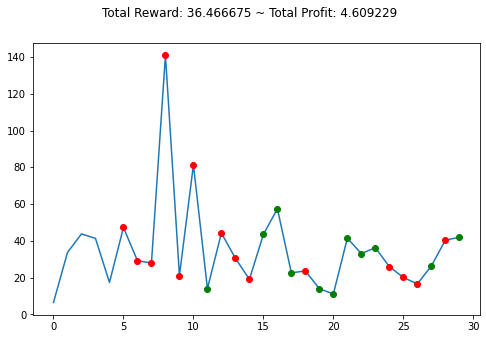

In [79]:
plt.figure(figsize=(8,5))
plt.cla()
env.render_all()
plt.show()

In [80]:
env_build = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)
env = DummyVecEnv([env_build])

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  class ObservationWrapper(Wrapper):
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.


In [81]:
from stable_baselines3.sac.policies import MlpPolicy
# from stable_baselines3.sac.policies import MlpLstmPolicy

In [ ]:
# !pip install stable-baselines3[extra]

In [ ]:
# Instantiate the agent
model = DQN("MlpPolicy", env, verbose=1)
# Train the agent and display a progress bar
model.learn(total_timesteps=int(2e5), progress_bar=False)

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7059     |
|    time_elapsed     | 0        |
|    total_timesteps  | 96       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6846     |
|    time_elapsed     | 0        |
|    total_timesteps  | 192      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 6819     |
|    time_elapsed     | 0        |
|    total_timesteps  | 288      |
----------------------------------
----------------------------------
| r

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 


Streaming output truncated to the last 5000 lines.
|    fps              | 1036     |
|    time_elapsed     | 157      |
|    total_timesteps  | 163104   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.92     |
|    n_updates        | 28275    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6800     |
|    fps              | 1036     |
|    time_elapsed     | 157      |
|    total_timesteps  | 163200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3        |
|    n_updates        | 28299    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6804     |
|    fps              | 1036     |
|   

## DQN Model

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 8490     |
|    time_elapsed     | 0        |
|    total_timesteps  | 93       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.824    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5682     |
|    time_elapsed     | 0        |
|    total_timesteps  | 185      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.683    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 5986     |
|    time_elapsed     | 0        |
|    total_timesteps  | 334      |
----------------------------------
----------------------------------
| r

<ipython-input-114-b0de93fc9b8d>:10: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe_ratio = (mean_return - risk_free_rate) / std_return


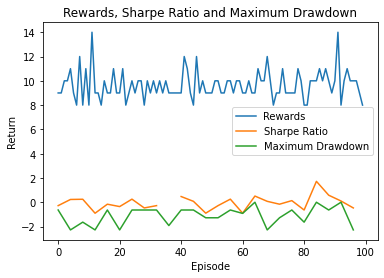

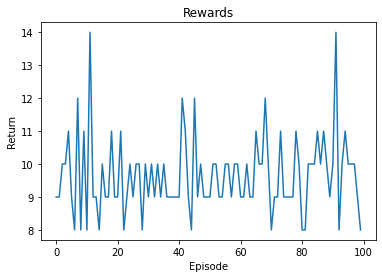

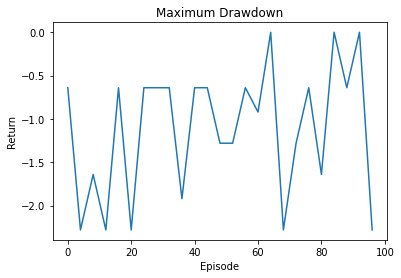

Sharpe Ratio: -0.00
Maximum Drawdown: -10.80


In [114]:
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    returns = np.array(returns)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    return sharpe_ratio

def calculate_maximum_drawdown(returns):
    cum_returns = np.cumsum(returns)
    running_max = np.maximum.accumulate(cum_returns)
    drawdown = cum_returns - running_max
    max_drawdown = np.min(drawdown)
    return max_drawdown

# Initialize the environment
env = gym.make("CartPole-v1")

# Wrap the environment with a vectorized environment
env = DummyVecEnv([lambda: env])

# Initialize the model
model = DQN("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Evaluate the model
results = []
for episode in range(100):
    episode_reward = 0
    obs = env.reset()
    while True:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        episode_reward += reward
        if done:
            results.append(episode_reward)
            break

# Calculate the Sharpe ratio and Maximum Drawdown every 4 time steps
rolling_window = 4
returns = np.array(results)
returns = returns - np.mean(returns)
sharpe_ratios = [calculate_sharpe_ratio(returns[i:i+rolling_window]) for i in range(0, len(returns), rolling_window)]
max_drawdowns = [calculate_maximum_drawdown(returns[i:i+rolling_window]) for i in range(0, len(returns), rolling_window)]

# Plot the results
plt.plot(results, label='Rewards')
plt.plot(np.arange(0, len(returns), rolling_window), sharpe_ratios, label='Sharpe Ratio')
plt.plot(np.arange(0, len(returns), rolling_window), max_drawdowns, label='Maximum Drawdown')
plt.title("Rewards, Sharpe Ratio and Maximum Drawdown")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.legend()
plt.show()


# Plot the results
plt.plot(results, label='Rewards')
plt.title("Rewards")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.show()

# Plot the results
# plt.plot(plt.plot(np.arange(0, len(returns), rolling_window), sharpe_ratios, label='Sharpe Ratio'))
# plt.title("Sharpe Ratio")
# plt.xlabel("Episode")
# plt.ylabel("Reward")
# plt.show()

# Plot the results
plt.plot(np.arange(0, len(returns), rolling_window), max_drawdowns, label='Maximum Drawdown')
plt.title("Maximum Drawdown")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.show()


# Calculate the Sharpe ratio
sharpe = calculate_sharpe_ratio(returns)
print("Sharpe Ratio: {:.2f}".format(sharpe))

# Calculate the Maximum Drawdown
md = calculate_maximum_drawdown(returns)
print("Maximum Drawdown: {:.2f}".format(md))


##A2C Model

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  class ObservationWrapper(Wrapper):
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.re

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 589      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | -0.0945  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.01     |
|    value_loss         | 4.58     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 601      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.673   |
|    explained_variance | -0.397   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 1.23     |
|    value_loss      

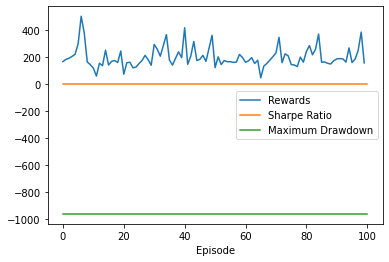

Sharpe Ratio: -0.00
Maximum Drawdown: -960.60


In [115]:
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    returns = np.array(returns)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    return sharpe_ratio

def calculate_maximum_drawdown(returns):
    cum_returns = np.cumsum(returns)
    running_max = np.maximum.accumulate(cum_returns)
    drawdown = cum_returns - running_max
    max_drawdown = np.min(drawdown)
    return max_drawdown

# Initialize the environment
env = gym.make("CartPole-v1")

# Wrap the environment with a vectorized environment
env = DummyVecEnv([lambda: env])

# Initialize the model
model = A2C("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Evaluate the model
results = []
for episode in range(100):
    episode_reward = 0
    obs = env.reset()
    while True:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        episode_reward += reward
        if done:
            results.append(episode_reward)
            break

# Calculate the Sharpe ratio and Maximum Drawdown
returns = np.array(results)
returns = returns - np.mean(returns)
sharpe_ratio = calculate_sharpe_ratio(returns)
max_drawdown = calculate_maximum_drawdown(returns)


# Plot the results
plt.plot(results, label='Rewards')
plt.plot([0, len(returns)], [sharpe_ratio, sharpe_ratio], label='Sharpe Ratio')
plt.plot([0, len(returns)], [max_drawdown, max_drawdown], label='Maximum Drawdown')
plt.xlabel("Episode")
plt.legend()
plt.show()

# Calculate the Sharpe ratio
sharpe = calculate_sharpe_ratio(returns)
print("Sharpe Ratio: {:.2f}".format(sharpe))

# Calculate the Maximum Drawdown
md = calculate_maximum_drawdown(returns)
print("Maximum Drawdown: {:.2f}".format(md))


## PPO Model

In [116]:
# import numpy as np
# import matplotlib.pyplot as plt
# from stable_baselines3 import PPO
# from stable_baselines3.ppo import MlpPolicy
# # from stable_baselines3 import episode_logs
# # from stable_baselines3.common import make_vec_env

# # Create the environment
# env = gym.make("CartPole-v1")

# # Train the model
# model = PPO(MlpPolicy, env, verbose=1)
# model.learn(total_timesteps=10000)

# # Get the episode returns and the mean reward
# returns = [x[2] for x in model.get_parameters()]
# mean_reward = np.mean(returns)

# # Calculate the Sharpe ratio
# std_reward = np.std(returns)
# sharpe_ratio = mean_reward / std_reward

# # Plot the episode returns
# plt.plot(returns)
# plt.xlabel('Episode')
# plt.ylabel('Return')
# plt.show()

# # Calculate the Maximum Drawdown
# running_max = np.maximum.accumulative_max(returns)
# drawdown = (running_max - returns) / running_max
# max_drawdown = np.max(drawdown)

# # Print the results
# print("Mean reward:", mean_reward)
# print("Standard deviation of reward:", std_reward)
# print("Sharpe ratio:", sharpe_ratio)
# print("Maximum drawdown:", max_drawdown)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | 22.3     |
| time/              |          |
|    fps             | 1314     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.8        |
|    ep_rew_mean          | 27.8        |
| time/                   |             |
|    fps                  | 779         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008833212 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss   

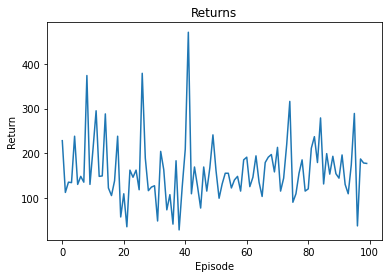

Sharpe Ratio: 36.28
Maximum Drawdown: 0.00


In [117]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

def sharpe_ratio(returns, risk_free=0.02):
    returns = np.array(returns)
    return (np.mean(returns - risk_free) / np.std(returns)) * np.sqrt(252)

def max_drawdown(returns):
    cumulative_returns = np.cumsum(returns)
    running_max = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - running_max) / running_max
    return np.min(drawdowns)

def plot_results(returns, title="Returns"):
    plt.plot(returns)
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.show()

# Initialize environment
env = gym.make("CartPole-v1")

# Train the PPO2 model
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Evaluate the trained model
returns = []
for episode in range(100):
    obs = env.reset()
    episode_return = 0
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        episode_return += reward
    returns.append(episode_return)

# Plot the returns
plot_results(returns, "Returns")

# Calculate the Sharpe ratio
sharpe = sharpe_ratio(returns)
print("Sharpe Ratio: {:.2f}".format(sharpe))

# Calculate the Maximum Drawdown
md = max_drawdown(returns)
print("Maximum Drawdown: {:.2f}".format(md))


In [118]:
# import matplotlib.pyplot as plt
# import numpy as np
# from stable_baselines3 import PPO
# # from stable_baselines3.common.policies import MlpPolicy

# # Define the environment
# env =gym.make("CartPole-v1")

# # Initialize the model
# model = PPO(MlpPolicy, env, verbose=1)

# # Train the model
# model.learn(total_timesteps=10000)

# # Get the rewards
# rewards = [x[2] for x in model.get_episode_logs()]

# # Plot the rewards
# plt.plot(rewards)
# plt.xlabel('Episode')
# plt.ylabel('Reward')
# plt.title('PPO Reward Plot')
# plt.show()

# # Evaluate the model using Sharpe Ratio and Maximum Drawdown
# def sharpe_ratio(returns, period=252):
#     return (np.mean(returns) / np.std(returns)) * np.sqrt(period)

# def max_drawdown(returns):
#     peak = returns[0]
#     max_dd = 0
#     for i in range(1, len(returns)):
#         if returns[i] > peak:
#             peak = returns[i]
#         dd = (peak - returns[i]) / peak
#         if dd > max_dd:
#             max_dd = dd
#     return max_dd

# returns = np.array(rewards)
# sharpe = sharpe_ratio(returns)
# md = max_drawdown(returns)
# print("Sharpe Ratio: ", sharpe)
# print("Maximum Drawdown: ", md)


In [ ]:
# model_train = A2C(MlpPolicy, env, verbose=1)
# # model_train = A2C('MlpLstmPolicy', env, verbose=1) 
# model_train.learn(total_timesteps=100000)

##Testing the Reinforcement Model

In [119]:
env = gym.make('stocks-v0', df=df, frame_bound=(25,35), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        print("rewards", rewards)
        break

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)


ValueError: ignored

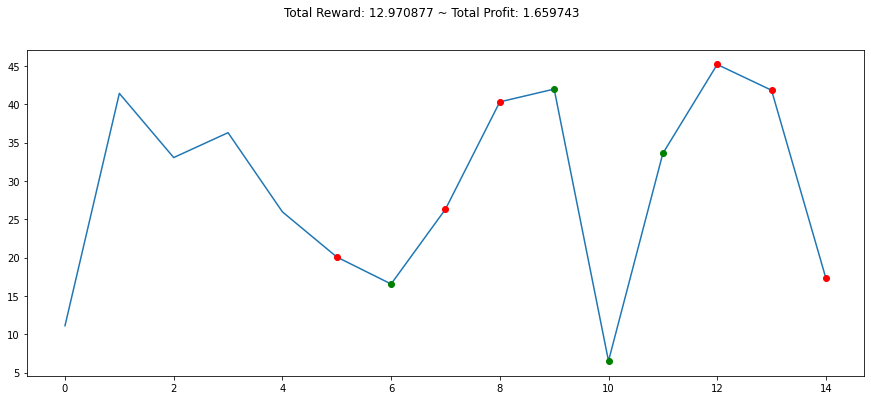

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Import the stock data
# data = pd.read_csv('/content/ETH.csv')

# Define the state and action space
num_stocks = data.shape[1] - 1
state_space = np.zeros((num_stocks, num_stocks))
np.fill_diagonal(state_space, 1)
action_space = [i / 100.0 for i in range(-100, 110, 10)]

# Define the reward function
def reward_function(state, action):
    portfolio = np.dot(state, data.iloc[:,:-1].T)
    returns = (portfolio / np.sum(portfolio)) * action
    return np.sum(returns)

# Define the Q-learning algorithm
def q_learning(num_episodes, discount_factor, learning_rate, epsilon):
    Q = np.zeros((num_stocks, len(action_space)))
    returns = []
    for episode in range(num_episodes):
        state = state_space[random.choice(range(num_stocks))]
        episode_return = 0
        done = False
        while not done:
            if random.uniform(0,1) < epsilon:
                action = random.choice(action_space)
            else:
                action = action_space[np.argmax(Q[np.where(state == 1)][0])]
            new_state = state * action
            reward = reward_function(state, action)
            episode_return += reward
            Q[np.where(state == 1), action_space.index(action)] += learning_rate * (reward + discount_factor * np.max(Q[np.where(new_state == 1)]) - Q[np.where(state == 1), action_space.index(action)])
            state = new_state
            if np.sum(new_state) == 0:
                done = True
        returns.append(episode_return)
    return Q, returns

# Train the Q-learning algorithm
Q, returns = q_learning(num_episodes=10000, discount_factor=0.95, learning_rate=0.01, epsilon=0.05)

# Plot the returns
sns.lineplot(x=range(len(returns)), y=returns)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.title('Portfolio Optimization with Q-Learning')
plt.show()


ValueError: ignored